# Blatt 1

## Aufgabe 1: Sythetische Zufallsdatensätze

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from util1 import *

## Theoretische Überlegungen

#### Wie sieht der bestmögliche Klassifikator aus, wenn beide Klassen "a priori" gleich wahrscheinlich sind?

Der bestmögliche Klassifikator "a priori" gleich wahrscheinlicher Klassen wird durch die Gerade

\begin{equation}
H = \left\{\vec{x} \mid \left( \begin{array}{c} -1 \\ -1 \end{array}\right) \cdot \vec{x} + 1.9 = 0\right\}
\end{equation}

beschrieben.

#### Wie groß ist der zu erwartende Testfehler für diesen optimalen Klassifikator, bzw. wie hoch wird die Wahrscheinlichkeit (das Risiko) einer Falschklassifikation sein?

Die Wahrscheinlichkeit, dass ein zufälliger Punkt aus $[0,1)\times[0,1)$ über die Gerade $H$ fällt, liegt bei
$\frac{0.1^2}{2} = 0.005$

#### Eine hinreichende (aber nicht notwendige) Vorraussetzung dafür, dass die obigen beiden Punktmengen linear separabel sind, ist gegeben, wenn kein Punkt im Bereich des Überlapps der beiden zugrundeliegenden (uniformen) Verteilungen liegt. Wie groß ist die Wahrscheinlichkeit, dass diese Vorraussetzung für zwei Punktmengen erfüllt ist?

Betrachten wir zunächst die Wahrscheinlichkeit des Ereignisses $E$, dass von Hundert uniform aus $[0,1)$ gezogenen Punkten keiner der Punkte in einen Bereich der Größe $0.1 \cdot 0.1$ fällt:

$o = $ Seitenlänge des quadratischen Überlapps
$n = $ Anzahl der Punkte
$$
P(E) = (1- o^2)^{n}
$$

Die Wahrscheinlichkeit des Ereignisses $E'$, dass keine der beiden Punktmengen einen Punkt im Überlapp enthält is somit:
$$
P(E') = P(E)^2
$$

In unserem Fall von $o=0,1$ und $n=100$ ergibt dies $P(E')\approx0.13397$ .

#### Läßt sich die Bedingung für lineare Separabilität noch enger fassen, also eine noch "realistischere" Abschätzung der Wahrscheinlichkeit der Separabilität finden?

Nach [Wikipedia](https://de.wikipedia.org/wiki/Lineare_Separierbarkeit):

Zwei Teilmengen $A \subseteq \mathbb{R}^n, B \subseteq \mathbb{R}^n $  heißen
''linear separierbar'', wenn $n+1$ reelle Zahlen $w_1,\dotsc, w_{n+1}$ existieren, so dass für alle $\vec{a}=(a_1,\dotsc,a_n) \in A, \vec{b}=(b_1,\dotsc,b_n) \in B$ die Ungleichungen

$$\sum_{i=1}^nw_ia_i \le w_{n+1} < \sum_{j=1}^nw_jb_j$$

gelten. Die Punkte $\vec{x}=(x_1,\dotsc,x_n)$ aus $\mathbb{R}^n$, für die $\textstyle \sum_{i=1}^nw_ix_i = w_{n+1}$ gilt, bilden die separierende Hyperebene.

#### Wie groß ist diese Wahrscheinlichkeit für einen 5-dimensionalen Eingaberaum, bei dem wir die beiden Datenmatrizen jeweils mit rand (wieder 100 Punkte) und die obige Verschiebung durch $v = (0.9, 0.9, 0.9, 0.9, 0.9)$ realisieren?

---

In [2]:
x_pos_mat, x_neg_mat = create_pos_neg(n=100, dim=2, neg_shift=[0.9, 0.9])

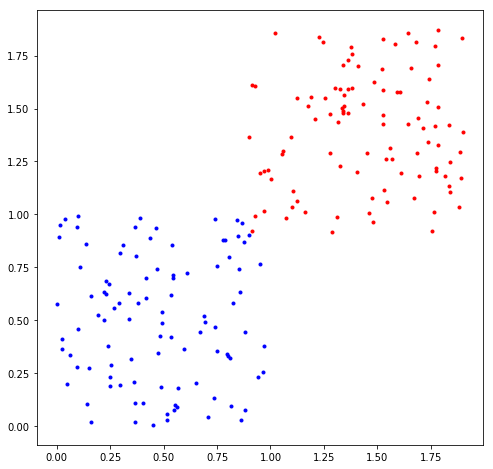

In [3]:
plot_pos_neg(x_pos_mat, x_neg_mat)

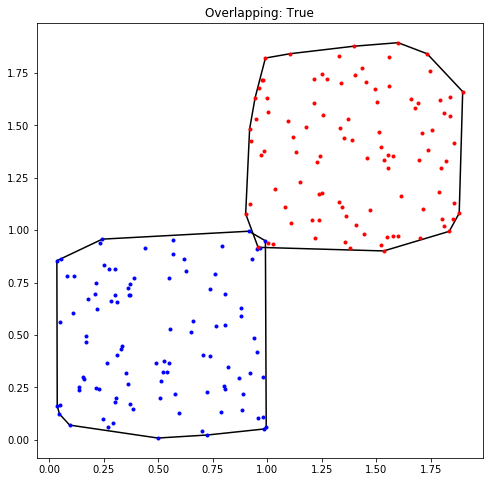

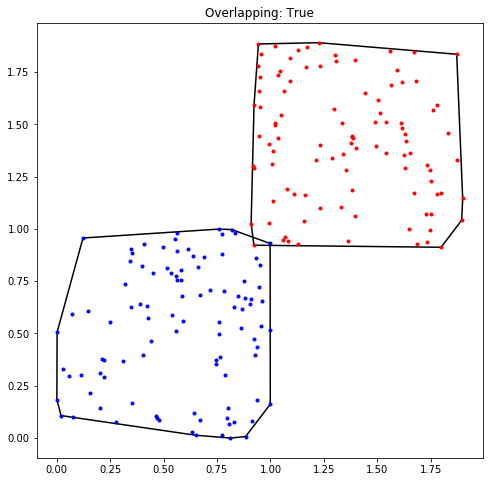

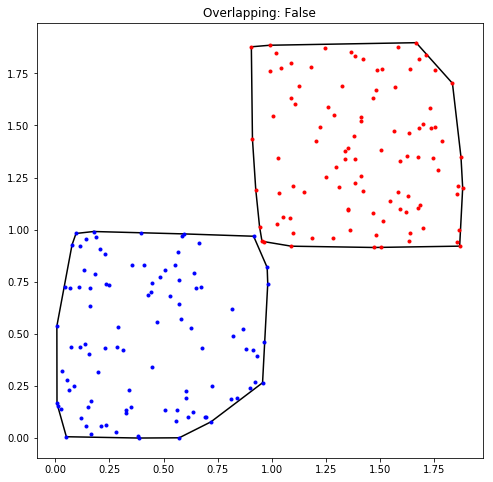

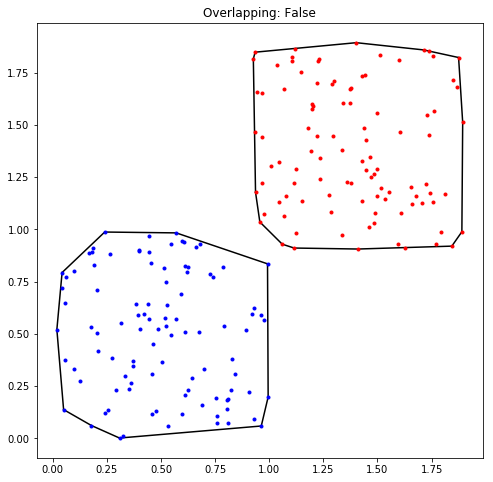

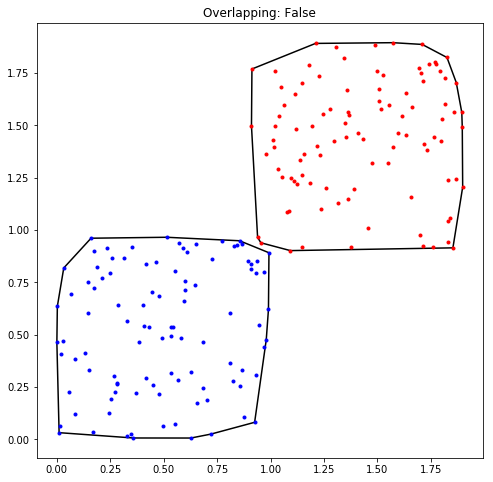

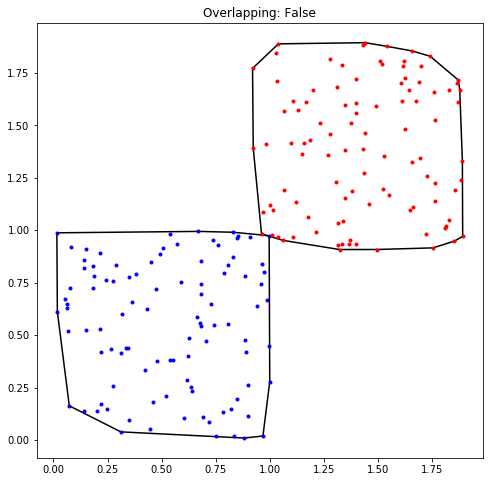

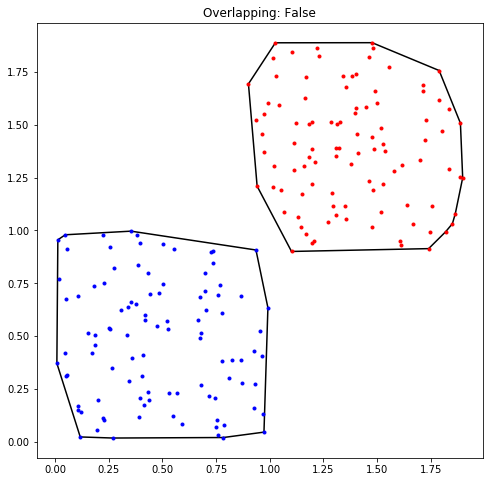

In [4]:
for i in range(0,10):
    pos, neg = create_pos_neg(n=100)
    overlapping = do_conv_hulls_overlap(pos, neg)
    plot_pos_neg(pos, neg, show_convex_hull=True, title=f"Overlapping: {overlapping}")

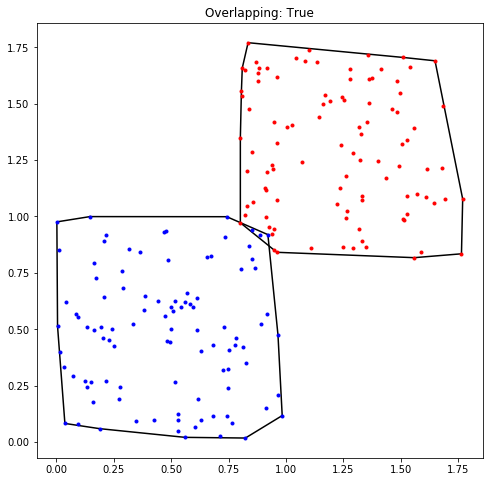

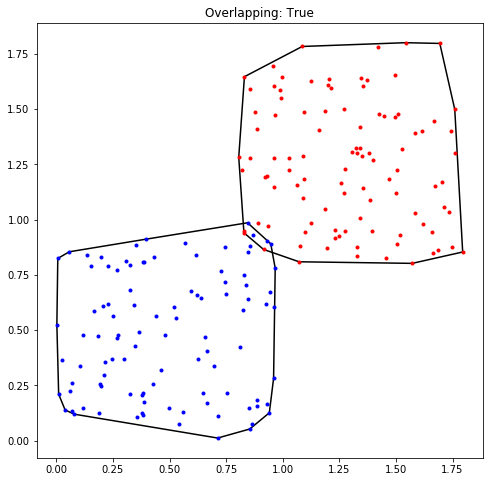

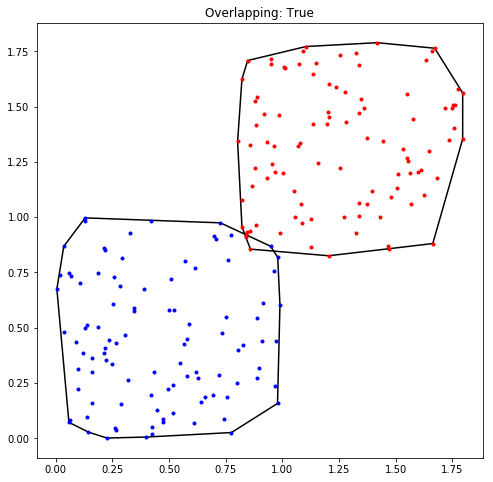

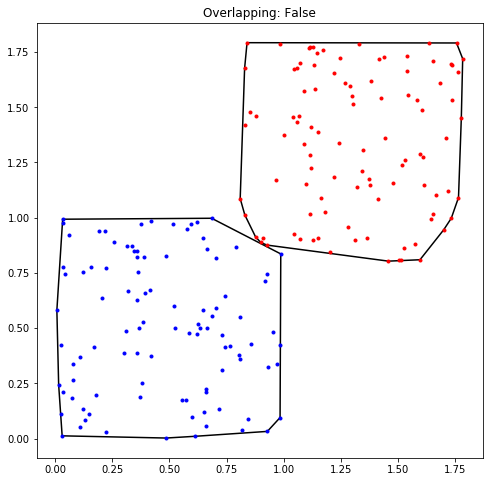

In [5]:
for i in range(0,10):
    pos, neg = create_pos_neg(n=100, neg_shift=[0.8, 0.8])
    overlapping = do_conv_hulls_overlap(pos, neg)
    plot_pos_neg(pos, neg, show_convex_hull=True, title=f"Overlapping: {overlapping}")

In [6]:
count = 0
for i in range(0, 30000):
    pos, neg = create_pos_neg(n=100, neg_shift=[0.9, 0.9])
    overlapping = do_conv_hulls_overlap(pos, neg)
    if overlapping:
        count += 1